In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..')))

from openghg_calscales import convert

# Usage

```openghg_calscales``` contains the ```convert``` function that converts gas mole fraction data from one calibration scale to another. The conversion can the the form of some function of the original scale, or some function of time. The data that defines these scales is stored in ```openghg_calscales/data/convert_functions.csv```.

The input to ```convert``` can be a pandas Series or an xarray DataArray, either of which should have a DatetimeIndex.

In [15]:
# Create a fake data Series
nt = 150
df = pd.Series(data = np.ones(nt)*300., 
              index=pd.date_range(start='1982-01-01', periods=nt, freq='MS'))

Text(0, 0.5, 'CFC-11 (ppb)')

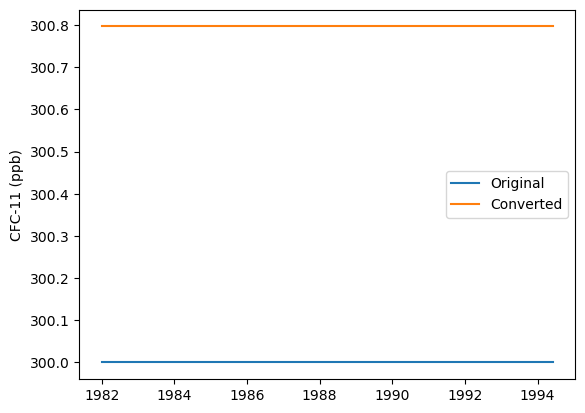

In [16]:
# Example for CFC-11 with a scaling from one scale to another. Note that this combines two individual conversions
df_convert = convert(df, "cfc11", "sio-93", "sio-05")
plt.plot(df.index, df.values, label="Original")
plt.plot(df_convert.index, df_convert.values, label="Converted")
plt.legend()
plt.ylabel("CFC-11 (ppb)")

Text(0, 0.5, 'N2O (ppb)')

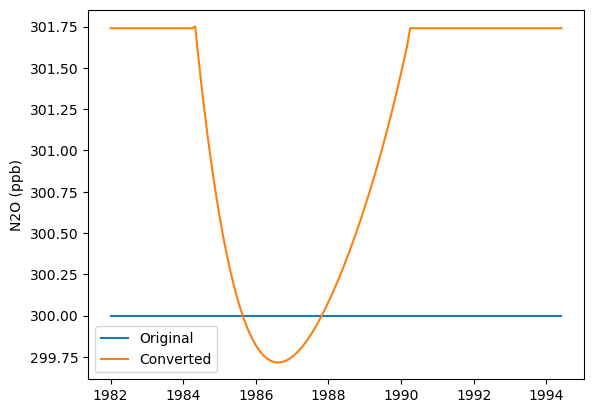

In [17]:
# Example for N2O with a time-variable scale between two dates
df_convert = convert(df, "n2o", "sio-93", "sio-98")
plt.plot(df.index, df.values, label="Original")
plt.plot(df_convert.index, df_convert.values, label="Converted")
plt.legend()
plt.ylabel("N2O (ppb)")